In [1]:
import cv2
import numpy as np
from scipy.signal import butter
from scipy import signal
from tqdm import tqdm
from scipy import stats as st
import os
import pandas as pd

from FeatureProcessingBHrPPG.main import *
from FeatureProcessing import roi
import matplotlib.pyplot as plt

import pickle as pk

In [2]:
rootDir = "D:\\D-Download\\Pub_BH-rPPG_FULL\\Pub_BH-rPPG_FULL\\"
videos = os.listdir(rootDir)

videosLow = []
videosMedium = []
videosHigh = []

for video in videos:
    if(video[-1] == '0'):
        videosLow.append(video)
    elif(video[-1] == '1'):
        videosMedium.append(video)
    elif(video[-1] == '2'):
        videosHigh.append(video)

print(
    len(videosLow),
    len(videosMedium),
    len(videosHigh)
)

35 35 35


In [3]:
i = 0

video = VideoFeature(rootDir + videosLow[i], videosLow[i], roi.getROI, maxObjects=4)

video.readVideo()
clrs = video.getColors(0)

1800
Reading video.. D:\D-Download\Pub_BH-rPPG_FULL\Pub_BH-rPPG_FULL\0_0\0_0


  0%|          | 0/132 [00:00<?, ?it/s]

100%|██████████| 132/132 [00:15<00:00,  8.28it/s]


In [5]:
colors = video.getTotolColorTrack()
colors.keys()

dict_keys(['red', 'green', 'blue', 'y'])

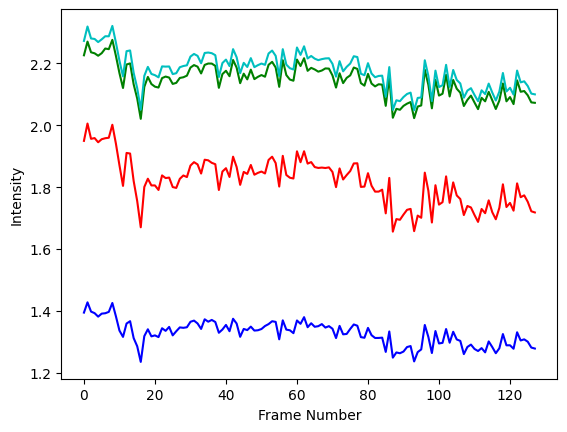

In [4]:
clrs = video.getColors(0)

plt.plot(clrs[0] - 0.75, color='r')
plt.plot(clrs[1], color='g')
plt.plot(clrs[2], color='b')
plt.plot(clrs[3], color='c')

plt.xlabel("Frame Number")
plt.ylabel("Intensity")

plt.show()

In [5]:
chrom = ChormFeatures(video)
chrom.buildCHROM()

feat = chrom.getFeatureImage()
cv2.imwrite("feat[0].png", feat[0][0])
cv2.imwrite("feat[1].png", feat[1][0])
cv2.imwrite("feat[2].png", feat[2][0])
cv2.imwrite("feat[3].png", feat[3][0])

True

In [6]:
chromObjs = {
   "Low" : [],
   "Medium" : [],
   "High" : []
} 

loc_root = "/content/drive/MyDrive/rPPG_Processed_Dataset/"

for i in range(len(videosLow)):
  print(f"processing video {videosLow[i]} {i+1}/{len(videosLow)}")

  video = VideoFeature(rootDir + videosLow[i], videosLow[i], roi.getROI, maxObjects=MAX_OBJECTS)
  video.readVideo() 

  chrom = ChormFeatures(video)
  chrom.buildCHROM()

  chromObjs['Low'].append(chrom)

  # -----

  print(f"processing video {videosMedium[i]} {i+1}/{len(videosMedium)}")

  video = VideoFeature(rootDir + videosMedium[i], videosMedium[i], roi.getROI, maxObjects=MAX_OBJECTS)
  video.readVideo() 

  chrom = ChormFeatures(video)
  chrom.buildCHROM()

  chromObjs['Medium'].append(chrom)

  # -----

  print(f"processing video {videosHigh[i]} {i+1}/{len(videosHigh)}")

  video = VideoFeature(rootDir + videosHigh[i], videosHigh[i], roi.getROI, maxObjects=MAX_OBJECTS)
  video.readVideo() 

  chrom = ChormFeatures(video)
  chrom.buildCHROM()

  chromObjs['High'].append(chrom)




100%|██████████| 900/900 [03:11<00:00,  4.70it/s]


processing video 9_1 35/35
1800
Reading video.. D:\D-Download\Pub_BH-rPPG_FULL\Pub_BH-rPPG_FULL\9_1\9_1


100%|██████████| 900/900 [03:05<00:00,  4.86it/s]


processing video 9_2 35/35
1800
Reading video.. D:\D-Download\Pub_BH-rPPG_FULL\Pub_BH-rPPG_FULL\9_2\9_2


100%|██████████| 900/900 [03:23<00:00,  4.42it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/rPPG_Processed_Dataset/chromObjs.pkl'

In [10]:
with open('D:\\D-Download\\Pub_BH-rPPG_FULL\\chromObjs(BhrPPG).pkl', 'wb') as file:
    pk.dump(chromObjs, file)